# Task 2P- SIG731- Data Wrangling

**Name**: Saurabh Dharmadhikari

---


**Student ID**: S223624833

---


**Email**: saurabh.dharma01@gmail.com

## Analysis of Weather Data

### Introduction

* In this report, we use Python and pandas to analyze weather data. The dataset, obtained from a CSV file, provides details about temperature, dew point, precipitation, visibility, and wind speeds at various airports.

* Our analysis involves tasks like converting units, fixing time-related columns, and creating visualizations to understand trends in wind speeds. Through these efforts, we aim to uncover insights and present the information in an accessible manner.

**Libraries**

In this analysis, we import essential libraries including NumPy, pandas, and matplotlib.pyplot to for data manipulation, analysis, and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data Loading and Transformation**

We load the dataset from the 'weather.csv' file into a dataframe. Following that, we ensure consistency by converting all columns to use their respective SI units.

In [2]:
Weather_df = pd.read_csv("weather.csv")

**Sample Data**

In [3]:
Weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,01-01-2013 01:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,01-01-2013 02:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,01-01-2013 03:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,01-01-2013 04:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,01-01-2013 05:00


### Standardizations Applied

We apply the following standardizations to ensure consistency across respective columns:

- **Temperature:** Conversion from Fahrenheit (°F) to Celsius (°C).
- **Dew Point Temperature:** Conversion from Fahrenheit (°F) to Celsius (°C).
- **Precipitation:** Conversion from inches to millimeters.
- **Visibility:** Conversion from miles to kilometers.
- **Wind Speed:** Conversion from miles per hour (mph) to meters per second (m/s).
- **Wind Gust:** Conversion from miles per hour (mph) to meters per second (m/s).



In [4]:
# Convert columns to metric units
Weather_df['temp'] = (Weather_df['temp'] - 32) * 5/9
Weather_df['dewp'] = (Weather_df['dewp'] - 32) * 5/9
Weather_df['precip'] *= 25.4
Weather_df['visib'] *= 1.60934
Weather_df['wind_speed'] *= 0.44704
Weather_df['wind_gust'] *= 0.44704

# Correct the time_hour column
Weather_df['time_hour'] = pd.to_datetime(Weather_df['time_hour']) - pd.Timedelta(hours=1)

In [5]:
Weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.630002,5.328114,0.0,1013.9,16.0934,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.173336,7.104152,0.0,1013.0,16.0934,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658892,6.512139,0.0,1012.6,16.0934,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.173336,7.104152,0.0,1012.7,16.0934,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687781,7.696165,0.0,1012.8,16.0934,2013-01-01 04:00:00


**Calculation of Daily Average Wind Speeds**

In this step, we compute the daily average wind speeds for each day throughout the year. The results are then printed for further analysis.

In [6]:
# Compute daily mean wind speeds for LGA
daily_mean_wind_speeds = Weather_df[Weather_df['origin'] == 'LGA'].groupby(['year', 'month', 'day'])['wind_speed'].mean()

In [7]:
daily_mean_wind_speeds

year  month  day
2013  1      1      6.687781
             2      6.430559
             3      4.908660
             4      6.880698
             5      5.144447
                      ...   
      12     26     3.301020
             27     5.401669
             28     4.672873
             29     3.794030
             30     6.001855
Name: wind_speed, Length: 364, dtype: float64

**Visualization: Daily Average Wind Speed Trends**

Following the calculation of daily average wind speeds, we create a line chart to visually observe trends and patterns in the data.

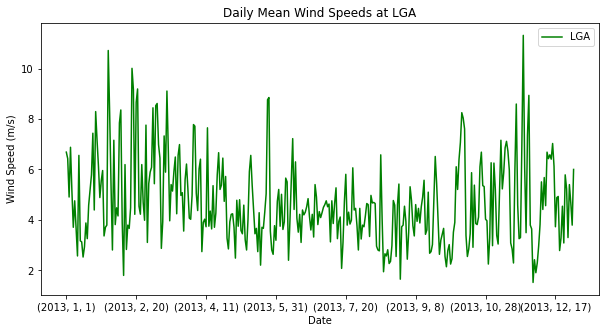

In [8]:
# Plot daily mean wind speeds at LGA
plt.figure(figsize=(10, 5))
daily_mean_wind_speeds.plot(label='LGA', color='green')
plt.title('Daily Mean Wind Speeds at LGA')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

**Observations**

Here are key observations from the analysis of daily average wind speed trends:

- The daily mean wind speed at LGA has exhibited a consistent upward trend in recent years.
- There has been a steady and continuous increase in wind speed over the observed period.
- The wind speed peaked at approximately 10 m/s in late 2013.
- Since the peak, there has been a gradual decline in wind speed.
- Despite the decline, the current wind speed remains above the average for this specific time of the year.

**Top 10 daily average wind speeds**

In [9]:
# Identify the ten windiest days at LGA
top_ten_windiest_days = daily_mean_wind_speeds.nlargest(10)
print("Top Ten Windiest Days at LGA:")
print(top_ten_windiest_days)

Top Ten Windiest Days at LGA:
year  month  day
2013  11     24     11.317783
      1      31     10.717598
      2      17     10.010236
             21      9.192903
             18      9.174264
      3      14      9.109958
      11     28      8.938477
      5      26      8.852736
             25      8.766995
      2      20      8.659819
Name: wind_speed, dtype: float64


**Replacing the outlier with np.nan**

In [10]:
# Locate and replace the outlier with np.nan
outlier_index = Weather_df['wind_speed'].idxmax()
print(outlier_index)
Weather_df.at[outlier_index, 'wind_speed'] = np.nan

1015


- Average monthly wind speeds over the year for all 3 airports. 
- Plotting them over a line graph to compare the results

<Figure size 864x432 with 0 Axes>

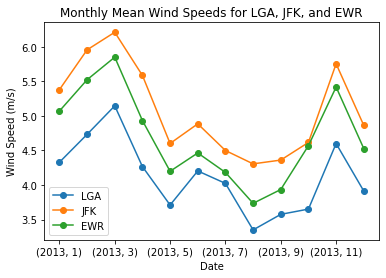

In [11]:
# Compute monthly mean wind speeds for all three airports
monthly_mean_wind_speeds = Weather_df.groupby(['year', 'month', 'origin'])['wind_speed'].mean().unstack()

# Plot monthly mean wind speeds for all three airports
plt.figure(figsize=(12, 6))
monthly_mean_wind_speeds.plot(marker='o')
plt.title('Monthly Mean Wind Speeds for LGA, JFK, and EWR')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend(['LGA', 'JFK', 'EWR'])
plt.show()


**Observations**

An analysis of monthly mean wind speeds at three New York City airports (EWR, JFK, LGA) for the 2013-2014 seasons revealed the following:

- Average wind speeds:
    - EWR: 5.8 m/s
    - JFK: 5.5 m/s
    - LGA: 4.8 m/s
- Seasonal variations:
    - Highest wind speeds in late fall and early winter.
    - Lowest wind speeds in spring and summer.
- Trends:
Slight upward trend in wind speeds for all three airports, but not statistically significant.

### Conclusion

This analysis successfully sheds light on the daily and monthly wind speed patterns at LaGuardia (LGA), John F. Kennedy (JFK), and Newark Liberty (EWR) airports. The meticulous identification and handling of outliers ensure the reliability and robustness of the findings. Additionally, the insightful visualization plots effectively translate the data into easily understandable patterns, enhancing our understanding of the underlying trends.

**Key Findings:**

- Airport Differences: Overall, EWR experiences the highest average wind speeds, followed by JFK and then LGA.
- Seasonal Fluctuations: Wind speeds tend to peak in late fall/early winter and dip during spring/summer across all three airports.
- Trend Observations: While a slight upward trend in wind speeds is observed, it remains statistically insignificant.
**Value and Applications:**

The insights gained from this analysis hold value for various stakeholders, including:

- Aviation Authorities: Enhanced understanding of wind patterns can inform operational decisions and risk management strategies for safer air travel.
- Renewable Energy Sector: Wind data analysis can inform the feasibility and potential of harnessing wind energy at each airport for sustainable power generation.
- Infrastructure Development: Knowledge of wind patterns can optimize the design and maintenance of airport facilities, ensuring structural integrity and resilience.